In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
df_anemia_complete = pd.read_csv('../files/01_csv/csv_consolidated/anemia_complete.csv')

In [7]:
df_anemia_complete.head()

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,ninho_casa_id,meses,sexo,flag_anemia
0,2015,102701,4,4,Amazonas,Urbano,Otro,Otro,Tierra / arena,1 - Muy pobre,4,42,Mujer,4 - Sin anemia
1,2015,104301,3,3,Amazonas,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,2 - Pobre,3,24,Hombre,3 - Leve
2,2015,108901,5,5,Amazonas,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,3 - Medio,4,48,Mujer,4 - Sin anemia
3,2015,109001,2,2,Amazonas,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,2 - Pobre,2,42,Mujer,4 - Sin anemia
4,2015,200601,6,6,Amazonas,Urbano,Otro,Conectado a red publica dentro de la vivienda,Tierra / arena,2 - Pobre,4,12,Mujer,3 - Leve


In [84]:
df_anemia_complete.ninho_casa_id.value_counts()

4     29082
3     26463
5     20182
6     11748
7      6328
8      3254
2      2587
9      1598
10      779
11      378
12      179
13      101
14       60
15       24
16       16
18        7
17        4
19        3
20        2
21        1
Name: ninho_casa_id, dtype: int64

In [13]:
df_anemia_complete.region.value_counts().sort_index()

Amazonas          4241
Ancash            3427
Apurimac          3575
Arequipa          3574
Ayacucho          4064
Cajamarca         3528
Callao            3677
Cusco             3304
Huancavelica      3415
Huanuco           4152
Ica               3962
Junin             3911
La Libertad       3723
Lambayeque        4110
Lima             11340
Loreto            4663
Madre de Dios     3693
Moquegua          3312
Pasco             3637
Piura             4131
Puno              2819
San Martin        4099
Tacna             3486
Tumbes            4193
Ucayali           4760
Name: region, dtype: int64

## trying to recover the stuff

In [34]:
# Path for csv
csv_path = '../files/01_csv/csv_by_year'

In [35]:
cols_ = ['ID1','CASEID','HIDX','H1','H2','H3','H4','H5','H6','H7','H8','H9','H11','H22','H31','H33','H44A','H44C','H46A']

In [36]:
df_en_salud_19 = pd.read_csv(f'{csv_path}/2019_ENDES/Modulo70_inmunizacion_y_salud/REC43.csv', encoding =  "ISO-8859-1")
print(df_en_salud_19.shape)
df_en_salud_19.head()

(21154, 168)


,ID1,CASEID,HIDX,H1,H2,H2D,H2M,H2Y,H3,H3D,...,H41A,H41B,H42,H43,H44A,H44B,H44C,H45,H46A,H46B
0,2019,000100201 2,1,1.0,1.0,13.0,10.0,2018.0,1.0,11.0,...,NaN,1.0,NaN,0.0,21.0,1.0,0.0,NaN,21.0,1.0
1,2019,000102801 2,1,1.0,1.0,18.0,12.0,2017.0,0.0,NaN,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,000102801 2,2,1.0,1.0,27.0,2.0,2015.0,0.0,NaN,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,12.0,2.0
3,2019,000104801 2,1,1.0,1.0,7.0,12.0,2015.0,1.0,6.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,000113601 2,1,1.0,1.0,27.0,10.0,2018.0,1.0,26.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_en_salud_19.shape

(21154, 168)

In [38]:
df_en_salud_19 = df_en_salud_19[cols_]
df_en_salud_19.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
0,2019,000100201 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,21.0,0.0,21.0
1,2019,000102801 2,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2019,000102801 2,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,12.0
3,2019,000104801 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN
4,2019,000113601 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [39]:
df_en_salud_19.H1.value_counts(dropna = False)

1.0    17422
2.0     2124
3.0     1261
NaN      217
0.0      130
Name: H1, dtype: int64

In [40]:
df_en_salud_18 = pd.read_csv(f'{csv_path}/2018_ENDES/Modulo70/REC43.csv', encoding =  "ISO-8859-1")
print(df_en_salud_18.shape)
df_en_salud_18.head()

(23089, 167)


,CASEID,HIDX,H1,H2,H2D,H2M,H2Y,H3,H3D,H3M,...,H41A,H41B,H42,H43,H44A,H44B,H44C,H45,H46A,H46B
0,000100701 2,1,1.0,1.0,9.0,8.0,2017.0,1.0,9.0,10.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,15.0,1.0
1,000101401 2,1,1.0,1.0,24.0,5.0,2017.0,1.0,22.0,7.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,000105301 2,1,1.0,1.0,31.0,3.0,2015.0,1.0,20.0,6.0,...,NaN,8.0,NaN,0.0,NaN,NaN,NaN,NaN,22.0,3.0
3,000107101 2,1,3.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,000112901 5,1,1.0,1.0,5.0,11.0,2013.0,1.0,25.0,1.0,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_en_salud_18['ID1'] = 2018
df_en_salud_18 = df_en_salud_18[cols_ ]
df_en_salud_18.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
0,2018,000100701 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,NaN,NaN,15.0
1,2018,000101401 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2018,000105301 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,8.0,NaN,NaN,22.0
3,2018,000107101 2,1,3.0,2.0,2.0,2.0,8.0,8.0,8.0,8.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2018,000112901 5,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN


In [73]:
df_en_salud_18.shape

(23089, 19)

In [74]:
df_en_salud_18.H1.value_counts(dropna = False)

1.0    18268
2.0     3592
3.0      871
NaN      213
0.0      145
Name: H1, dtype: int64

In [42]:
df_en_salud_17 = pd.read_csv(f'{csv_path}/2017_ENDES/Modulo70/REC43.csv', encoding =  "ISO-8859-1")
print(df_en_salud_17.shape)
df_en_salud_17.head()

(21528, 168)


,CASEID,HIDX,H1,H2,H2D,H2M,H2Y,H3,H3D,H3M,...,H41B,H42,H43,H44A,H44B,H44C,H45,H46A,H46B,HIDX1
0,000103201 2,1,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000103601 2,1,3.0,2.0,NaN,NaN,NaN,8.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000104501 2,1,2.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000104501 2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000104501 2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_en_salud_17['ID1'] = 2017
df_en_salud_17 = df_en_salud_17[cols_ ]
df_en_salud_17.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
0,2017,000103201 2,1,2.0,2.0,2.0,2.0,8.0,8.0,8.0,8.0,2.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN
1,2017,000103601 2,1,3.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN
2,2017,000104501 2,1,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2017,000104501 2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,000104501 2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_en_salud_17.H1.value_counts(dropna = False)

1.0    16842
2.0     3493
3.0      735
NaN      256
0.0      202
Name: H1, dtype: int64

In [45]:
df_en_salud_16 = pd.read_csv(f'{csv_path}/2016_ENDES/Modulo70/REC43.csv', encoding =  "ISO-8859-1")
print(df_en_salud_16.shape)
df_en_salud_16.head()

(21175, 167)


,CASEID,HIDX,H1,H2,H2D,H2M,H2Y,H3,H3D,H3M,...,H41A,H41B,H42,H43,H44A,H44B,H44C,H45,H46A,H46B
0,000100301 2,1,1.0,1.0,11.0,7.0,2013.0,1.0,10.0,9.0,...,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,14.0,1.0
1,000102801 1,1,1.0,1.0,29.0,12.0,2011.0,1.0,7.0,3.0,...,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,14.0,1.0
2,000106101 2,1,1.0,0.0,NaN,NaN,NaN,1.0,1.0,12.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,12.0,1.0
3,000108301 2,1,1.0,1.0,14.0,9.0,2012.0,1.0,14.0,9.0,...,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,000109301 2,1,1.0,1.0,2.0,1.0,2015.0,1.0,7.0,3.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_en_salud_16['ID1'] = 2016
df_en_salud_16 = df_en_salud_16[cols_ ]
df_en_salud_16.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
0,2016,000100301 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,NaN,NaN,14.0
1,2016,000102801 1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,NaN,NaN,14.0
2,2016,000106101 2,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,NaN,NaN,12.0
3,2016,000108301 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2016,000109301 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [80]:
df_en_salud_16.CASEID.value_counts()

053602601  2    4
309900201  2    4
114203101  7    3
311511601  5    3
289210401  2    3
               ..
054401201  2    1
137007501  2    1
005802901  2    1
042904201  2    1
271000601  4    1
Name: CASEID, Length: 18087, dtype: int64

In [81]:
df_en_salud_16[df_en_salud_16['CASEID'] == '053602601  2']

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
3419,2016,053602601 2,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN
3420,2016,053602601 2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
3421,2016,053602601 2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
3422,2016,053602601 2,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN


In [82]:
df_en_salud_16.HIDX.value_counts()

1    18087
2     2906
3      180
4        2
Name: HIDX, dtype: int64

In [47]:
df_en_salud_15 = pd.read_csv(f'{csv_path}/2015_ENDES/Modulo70/REC43.csv', encoding =  "ISO-8859-1")
print(df_en_salud_15.shape)
df_en_salud_15.head()

(23821, 167)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5,6,12,13,14,21,22,28,30,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,caseid,hidx,h1,h2,h2d,h2m,h2y,h3,h3d,h3m,...,h41a,h41b,h42,h43,h44a,h44b,h44c,h45,h46a,h46b
0,000102701 1,1,"yes, not seen",reported by mother,NaN,NaN,NaN,reported by mother,NaN,NaN,...,NaN,yes,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
1,000104301 1,1,"yes, seen",vacc. date on card,25.0,6.0,2013.0,vacc. date on card,8.0,8.0,...,no,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
2,000108901 2,1,"yes, seen",vacc. date on card,5.0,7.0,2011.0,vacc. date on card,22.0,11.0,...,NaN,yes,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
3,000109001 1,1,"yes, not seen",reported by mother,NaN,NaN,NaN,reported by mother,NaN,NaN,...,NaN,yes,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
4,000200601 2,1,"yes, seen",vacc. date on card,18.0,6.0,2014.0,vacc. date on card,31.0,7.0,...,NaN,yes,NaN,no,NaN,NaN,NaN,NaN,health post minsa,1.0


In [48]:
cols_lower_ = [x.lower() for x in cols_]
cols_lower_

['id1',
 'caseid',
 'hidx',
 'h1',
 'h2',
 'h3',
 'h4',
 'h5',
 'h6',
 'h7',
 'h8',
 'h9',
 'h11',
 'h22',
 'h31',
 'h33',
 'h44a',
 'h44c',
 'h46a']

In [49]:
df_en_salud_15['id1'] = 2015
df_en_salud_15 = df_en_salud_15[cols_lower_ ]
df_en_salud_15.head()

,id1,caseid,hidx,h1,h2,h3,h4,h5,h6,h7,h8,h9,h11,h22,h31,h33,h44a,h44c,h46a
0,2015,000102701 1,1,"yes, not seen",reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,no,no,no,reported by mother,NaN,NaN,NaN
1,2015,000104301 1,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,no,no,no,vacc. date on card,NaN,NaN,NaN
2,2015,000108901 2,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. marked on card,vacc. date on card,vacc. date on card,no,vacc. date on card,vacc. marked on card,no,no,"yes, last two weeks",reported by mother,NaN,NaN,NaN
3,2015,000109001 1,1,"yes, not seen",reported by mother,reported by mother,reported by mother,no,no,no,no,reported by mother,no,no,no,reported by mother,NaN,NaN,NaN
4,2015,000200601 2,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,no,no,yes,"yes, last two weeks",no,NaN,NaN,health post minsa


In [50]:
df_en_salud_15.columns = [x.upper() for x in df_en_salud_15.columns]

In [51]:
df_en_salud_15.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33,H44A,H44C,H46A
0,2015,000102701 1,1,"yes, not seen",reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,reported by mother,no,no,no,reported by mother,NaN,NaN,NaN
1,2015,000104301 1,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,no,no,no,vacc. date on card,NaN,NaN,NaN
2,2015,000108901 2,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. marked on card,vacc. date on card,vacc. date on card,no,vacc. date on card,vacc. marked on card,no,no,"yes, last two weeks",reported by mother,NaN,NaN,NaN
3,2015,000109001 1,1,"yes, not seen",reported by mother,reported by mother,reported by mother,no,no,no,no,reported by mother,no,no,no,reported by mother,NaN,NaN,NaN
4,2015,000200601 2,1,"yes, seen",vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,vacc. date on card,no,no,yes,"yes, last two weeks",no,NaN,NaN,health post minsa


In [52]:
print(df_en_salud_15.H1.value_counts(dropna=False))
print()
print(df_en_salud_16.H1.value_counts(dropna=False))
print()
print(df_en_salud_17.H1.value_counts(dropna=False))
print()
print(df_en_salud_18.H1.value_counts(dropna=False))
print()
print(df_en_salud_19.H1.value_counts(dropna=False))
print()

yes, seen             19144
yes, not seen          3419
no longer has card      733
NaN                     284
no card                 241
Name: H1, dtype: int64

1.0    16736
2.0     3218
3.0      787
NaN      233
0.0      201
Name: H1, dtype: int64

1.0    16842
2.0     3493
3.0      735
NaN      256
0.0      202
Name: H1, dtype: int64

1.0    18268
2.0     3592
3.0      871
NaN      213
0.0      145
Name: H1, dtype: int64

1.0    17422
2.0     2124
3.0     1261
NaN      217
0.0      130
Name: H1, dtype: int64



In [53]:
print(df_en_salud_15.H2.value_counts(dropna=False))
print()
print(df_en_salud_16.H2.value_counts(dropna=False))
print()
print(df_en_salud_17.H2.value_counts(dropna=False))
print()
print(df_en_salud_18.H2.value_counts(dropna=False))
print()
print(df_en_salud_19.H2.value_counts(dropna=False))
print()

vacc. date on card      17967
reported by mother       4192
no                       1253
NaN                       284
vacc. marked on card       85
dk                         40
Name: H2, dtype: int64

1.0    15790
2.0     3971
0.0     1076
NaN      233
3.0       67
8.0       38
Name: H2, dtype: int64

1.0    15925
2.0     4181
0.0     1090
NaN      256
3.0       54
8.0       22
Name: H2, dtype: int64

1.0    17191
2.0     4581
0.0     1013
NaN      213
3.0       59
8.0       32
Name: H2, dtype: int64

1.0    16499
2.0     3567
0.0      814
NaN      217
3.0       45
8.0       12
Name: H2, dtype: int64



In [54]:
print(df_en_salud_15.H3.value_counts(dropna=False))
print()
print(df_en_salud_16.H3.value_counts(dropna=False))
print()
print(df_en_salud_17.H3.value_counts(dropna=False))
print()
print(df_en_salud_18.H3.value_counts(dropna=False))
print()
print(df_en_salud_19.H3.value_counts(dropna=False))
print()

vacc. date on card      18062
reported by mother       3421
no                       1803
NaN                       284
dk                        248
vacc. marked on card        3
Name: H3, dtype: int64

1.0    15766
2.0     3414
0.0     1522
8.0      238
NaN      233
3.0        2
Name: H3, dtype: int64

1.0    15852
2.0     3747
0.0     1520
NaN      256
8.0      153
Name: H3, dtype: int64

1.0    17290
2.0     3988
0.0     1429
NaN      213
8.0      168
3.0        1
Name: H3, dtype: int64

1.0    16570
2.0     3069
0.0     1185
NaN      217
8.0      113
Name: H3, dtype: int64



In [55]:
print(df_en_salud_15.H4.value_counts(dropna=False))
print()
print(df_en_salud_16.H4.value_counts(dropna=False))
print()
print(df_en_salud_17.H4.value_counts(dropna=False))
print()
print(df_en_salud_18.H4.value_counts(dropna=False))
print()
print(df_en_salud_19.H4.value_counts(dropna=False))
print()

vacc. date on card      18061
reported by mother       4009
no                       1366
NaN                       284
vacc. marked on card       59
dk                         42
Name: H4, dtype: int64

1.0    15947
2.0     3805
0.0     1087
NaN      233
8.0       67
3.0       36
Name: H4, dtype: int64

1.0    16099
2.0     3986
0.0     1094
NaN      256
8.0       53
3.0       40
Name: H4, dtype: int64

1.0    17418
2.0     4343
0.0     1022
NaN      213
8.0       50
3.0       43
Name: H4, dtype: int64

1.0    16644
2.0     3354
0.0      868
NaN      217
3.0       42
8.0       29
Name: H4, dtype: int64



In [56]:
print(df_en_salud_15.H11.value_counts(dropna=False))
print()
print(df_en_salud_16.H11.value_counts(dropna=False))
print()
print(df_en_salud_17.H11.value_counts(dropna=False))
print()
print(df_en_salud_18.H11.value_counts(dropna=False))
print()
print(df_en_salud_19.H11.value_counts(dropna=False))
print()

no                     20393
yes, last two weeks     3097
NaN                      284
don't know                47
Name: H11, dtype: int64

0.0    18289
2.0     2609
NaN      233
8.0       44
Name: H11, dtype: int64

0.0    18692
2.0     2522
NaN      254
8.0       60
Name: H11, dtype: int64

0.0    20292
2.0     2531
NaN      213
8.0       53
Name: H11, dtype: int64

0.0    18405
2.0     2483
NaN      217
8.0       49
Name: H11, dtype: int64



In [57]:
print(df_en_salud_15.H22.value_counts(dropna=False))
print()
print(df_en_salud_16.H22.value_counts(dropna=False))
print()
print(df_en_salud_17.H22.value_counts(dropna=False))
print()
print(df_en_salud_18.H22.value_counts(dropna=False))
print()
print(df_en_salud_19.H22.value_counts(dropna=False))
print()

no     18690
yes     4797
NaN      286
dk        48
Name: H22, dtype: int64

0.0    16547
1.0     4342
NaN      233
8.0       53
Name: H22, dtype: int64

0.0    17288
1.0     3922
NaN      254
8.0       64
Name: H22, dtype: int64

0.0    18486
1.0     4331
NaN      213
8.0       59
Name: H22, dtype: int64

0.0    16906
1.0     3979
NaN      217
8.0       52
Name: H22, dtype: int64



In [58]:
print(df_en_salud_15.H33.value_counts(dropna=False))
print()
print(df_en_salud_16.H33.value_counts(dropna=False))
print()
print(df_en_salud_17.H33.value_counts(dropna=False))
print()
print(df_en_salud_18.H33.value_counts(dropna=False))
print()
print(df_en_salud_19.H33.value_counts(dropna=False))
print()

no                      18057
vacc. date on card       2670
reported by mother       2372
dk                        398
NaN                       284
vacc. marked on card       40
Name: H33, dtype: int64

0.0    11715
1.0     4594
2.0     4333
8.0      258
NaN      233
3.0       42
Name: H33, dtype: int64

0.0    12859
1.0     4160
2.0     3991
NaN      254
8.0      224
3.0       40
Name: H33, dtype: int64

0.0    13361
2.0     4615
1.0     4593
8.0      251
NaN      213
3.0       56
Name: H33, dtype: int64

0.0    12605
2.0     4265
1.0     3778
8.0      230
NaN      217
3.0       59
Name: H33, dtype: int64



In [102]:
print(df_en_salud_15.H44A.value_counts(dropna=False))
print()
print(df_en_salud_16.H44A.value_counts(dropna=False))
print()
print(df_en_salud_17.H44A.value_counts(dropna=False))
print()
print(df_en_salud_18.H44A.value_counts(dropna=False))
print()
print(df_en_salud_19.H44A.value_counts(dropna=False))
print()

NaN                        22090
health post minsa            380
friend/relative              353
health center minsa          287
traditional healer           193
private doctor               112
hospital minsa               101
hospital essalud             100
popular botiquin              99
other                         31
center/post essalud           27
can't be established          22
pharmacy                      11
health worker                  7
private clinic                 5
hospital f.f aa.and pnp        3
Name: H44A, dtype: int64

NaN     19687
31.0      308
15.0      302
14.0      253
32.0      138
23.0      133
22.0       94
11.0       86
12.0       76
16.0       38
96.0       21
98.0       15
13.0       11
24.0        5
21.0        4
17.0        4
Name: H44A, dtype: int64

NaN     20148
31.0      322
15.0      253
14.0      229
32.0      148
23.0      122
22.0       84
11.0       81
12.0       79
16.0       30
96.0       19
98.0        6
13.0        3
17.0        3


In [59]:
df_en_salud = pd.concat([df_en_salud_15,df_en_salud_16,df_en_salud_17,df_en_salud_18,df_en_salud_19], axis=0)

In [60]:
df_en_salud.columns

Index(['ID1', 'CASEID', 'HIDX', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
       'H9', 'H11', 'H22', 'H31', 'H33', 'H44A', 'H44C', 'H46A'],
      dtype='object')

In [61]:
df_en_salud = df_en_salud[['ID1', 'CASEID', 'HIDX', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
       'H9', 'H11', 'H22', 'H31', 'H33']]

In [62]:
dict_h1 = {
    'yes, seen': 'Si, tarjeta vista',
    'yes, not seen': 'Si, tarjeta no vista',
    'no longer has card': 'Ya no tiene tarjeta',
    'no card': 'Sin tarjeta',
    0: 'Sin tarjeta',
    1: 'Si, tarjeta vista',
    2: 'Si, tarjeta no vista',
    3: 'Ya no tiene tarjeta'
}

In [63]:
dict_reported = {
    'vacc. date on card': 'Vacuna, fecha en la tarjeta',
    'reported by mother': 'Reportado por la madre',
    'no': 'No',
    'dk': 'No sabe',
    'vacc. marked on card': 'Vacuna, marcada en la tarjeta',
    0: 'No',
    1: 'Vacuna, fecha en la tarjeta',
    2: 'Reportado por la madre',
    3: 'Vacuna, marcada en la tarjeta',
    8: 'No sabe'
}

In [64]:
dict_other_sec = {
    'no': 'No',
    'yes, last two weeks': 'Si, las ultimas 2 semanas',
    "don't know": 'No sabe',
    0: 'No',
    2: 'Si, las ultimas 2 semanas',
    8: 'No sabe'
}

In [65]:
dict_fever = {
    'no': 'No',
    'yes': 'Si',
    'dk': 'No sabe',
    0: 'No',
    1: 'Si',
    8: 'No sabe'
}

In [66]:
df_en_salud.shape

(110767, 16)

In [67]:
df_en_salud.H1.value_counts()

1.0                   69268
yes, seen             19144
2.0                   12427
3.0                    3654
yes, not seen          3419
no longer has card      733
0.0                     678
no card                 241
Name: H1, dtype: int64

In [68]:
df_en_salud.H1 = df_en_salud.H1.apply(lambda x: dict_h1[x] if not pd.isna(x) else x)

In [69]:
df_en_salud.H1.value_counts()

Si, tarjeta vista       88412
Si, tarjeta no vista    15846
Ya no tiene tarjeta      4387
Sin tarjeta               919
Name: H1, dtype: int64

In [70]:
df_en_salud.H9.value_counts()

1.0                     50552
0.0                     22638
vacc. date on card      13622
2.0                     12037
no                       6796
reported by mother       2911
8.0                       692
dk                        180
3.0                       108
vacc. marked on card       28
Name: H9, dtype: int64

In [71]:
df_en_salud.H3.value_counts()

1.0                     65478
vacc. date on card      18062
2.0                     14218
0.0                      5656
reported by mother       3421
no                       1803
8.0                       672
dk                        248
vacc. marked on card        3
3.0                         3
Name: H3, dtype: int64

In [72]:
df_en_salud.H2 = df_en_salud.H2.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H3 = df_en_salud.H3.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H4 = df_en_salud.H4.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H5 = df_en_salud.H5.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H6 = df_en_salud.H6.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H7 = df_en_salud.H7.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H8 = df_en_salud.H8.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H9 = df_en_salud.H9.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)
df_en_salud.H33 = df_en_salud.H33.apply(lambda x: dict_reported[x] if not pd.isna(x) else x)

In [73]:
print(df_en_salud.H2.value_counts())
print(df_en_salud.H3.value_counts())
print(df_en_salud.H4.value_counts())
print(df_en_salud.H5.value_counts())
print(df_en_salud.H6.value_counts())
print(df_en_salud.H7.value_counts())
print(df_en_salud.H8.value_counts())
print(df_en_salud.H9.value_counts())
print(df_en_salud.H33.value_counts())

Vacuna, fecha en la tarjeta      83372
Reportado por la madre           20492
No                                5246
Vacuna, marcada en la tarjeta      310
No sabe                            144
Name: H2, dtype: int64
Vacuna, fecha en la tarjeta      83540
Reportado por la madre           17639
No                                7459
No sabe                            920
Vacuna, marcada en la tarjeta        6
Name: H3, dtype: int64
Vacuna, fecha en la tarjeta      84169
Reportado por la madre           19497
No                                5437
No sabe                            241
Vacuna, marcada en la tarjeta      220
Name: H4, dtype: int64
Vacuna, fecha en la tarjeta      78921
No                               14210
Reportado por la madre           13096
No sabe                           3331
Vacuna, marcada en la tarjeta        6
Name: H5, dtype: int64
Vacuna, fecha en la tarjeta      79256
Reportado por la madre           15050
No                               12330
No sabe    

In [74]:
# dict_other_sec
df_en_salud.H11 = df_en_salud.H11.apply(lambda x: dict_other_sec[x] if not pd.isna(x) else x)

In [75]:
print(df_en_salud.H11.value_counts())

No                           96071
Si, las ultimas 2 semanas    13242
No sabe                        253
Name: H11, dtype: int64


In [76]:
print(df_en_salud.H22.value_counts())

0.0    69227
no     18690
1.0    16574
yes     4797
8.0      228
dk        48
Name: H22, dtype: int64


In [77]:
df_en_salud.H22 = df_en_salud.H22.apply(lambda x: dict_fever[x] if not pd.isna(x) else x)

In [78]:
print(df_en_salud.H22.value_counts())

No         87917
Si         21371
No sabe      276
Name: H22, dtype: int64


In [79]:
# dict_other_sec
df_en_salud.H31 = df_en_salud.H31.apply(lambda x: dict_other_sec[x] if not pd.isna(x) else x)

In [80]:
print(df_en_salud.H31.value_counts())

No                           72511
Si, las ultimas 2 semanas    36789
No sabe                        266
Name: H31, dtype: int64


In [81]:
df_en_salud.shape

(110767, 16)

In [82]:
df_en_salud.head()

,ID1,CASEID,HIDX,H1,H2,H3,H4,H5,H6,H7,H8,H9,H11,H22,H31,H33
0,2015,000102701 1,1,"Si, tarjeta no vista",Reportado por la madre,Reportado por la madre,Reportado por la madre,Reportado por la madre,Reportado por la madre,Reportado por la madre,Reportado por la madre,Reportado por la madre,No,No,No,Reportado por la madre
1,2015,000104301 1,1,"Si, tarjeta vista","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",No,No,No,"Vacuna, fecha en la tarjeta"
2,2015,000108901 2,1,"Si, tarjeta vista","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, marcada en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",No,"Vacuna, fecha en la tarjeta","Vacuna, marcada en la tarjeta",No,No,"Si, las ultimas 2 semanas",Reportado por la madre
3,2015,000109001 1,1,"Si, tarjeta no vista",Reportado por la madre,Reportado por la madre,Reportado por la madre,No,No,No,No,Reportado por la madre,No,No,No,Reportado por la madre
4,2015,000200601 2,1,"Si, tarjeta vista","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",No,No,Si,"Si, las ultimas 2 semanas",No


In [83]:
df_en_salud.to_csv('../files/01_csv/csv_consolidated/vacunas.csv',index=False)

In [84]:
df_en_salud.loc[:,'HHID'] = df_en_salud.CASEID.apply(lambda x: int(x.split()[0]))

In [85]:
df_en_salud.to_csv('../files/01_csv/csv_consolidated/vacunas.csv',index=False)

In [86]:
#####
#read

import numpy as np 
import pandas as pd

df_en_salud = pd.read_csv('../files/01_csv/csv_consolidated/vacunas.csv')
df_hogar = pd.read_csv('../files/01_csv/csv_consolidated/hogar.csv')
df_persona = pd.read_csv('../files/01_csv/csv_consolidated/persona.csv')
df_vivienda = pd.read_csv('../files/01_csv/csv_consolidated/vivienda.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [87]:
df_persona.shape

(833507, 6)

In [88]:
df_persona.head()

,ID1,HHID,HVIDX,HV104,HV105,HV109
0,2014,142700601,1,Femenino,18,Superior
1,2014,142701701,1,Masculino,34,Superior
2,2014,142701701,2,Femenino,35,Superior
3,2014,142701701,3,Femenino,12,Secundaria incompleta
4,2014,142701701,4,Femenino,8,Primeria incompleta


In [89]:
df_persona.loc[: , 'CASEID'] = df_persona.apply(lambda x : str(x['HHID']).zfill(9) + '  ' + str(x['HVIDX']), axis = 1)

In [90]:
df_persona.head()

,ID1,HHID,HVIDX,HV104,HV105,HV109,CASEID
0,2014,142700601,1,Femenino,18,Superior,142700601 1
1,2014,142701701,1,Masculino,34,Superior,142701701 1
2,2014,142701701,2,Femenino,35,Superior,142701701 2
3,2014,142701701,3,Femenino,12,Secundaria incompleta,142701701 3
4,2014,142701701,4,Femenino,8,Primeria incompleta,142701701 4


In [91]:
df_hogar.shape

(215255, 6)

In [92]:
df_hogar.head()

,ID1,HHID,HV012,HV013,HV024,HV025
0,2014,252300501,4,4,Lima,Urbano
1,2014,252301601,11,11,Lima,Urbano
2,2014,252302701,5,5,Lima,Urbano
3,2014,252303801,8,8,Lima,Urbano
4,2014,252304901,3,3,Lima,Urbano


In [93]:
df_vivienda.shape

(197430, 6)

In [94]:
df_vivienda.head()

,ID1,HHID,HV201,HV205,HV213,HV270
0,2014,142700601,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,3 - Medio
1,2014,142701701,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,3 - Medio
2,2014,142702901,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Losetas / terrazos,4 - Rico
3,2014,142704001,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Losetas / terrazos,5 - Muy rico
4,2014,142705101,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,2 - Pobre


In [95]:
df_persona.shape

(833507, 7)

In [96]:
df_en_salud.shape

(110767, 17)

In [97]:
df_merge = pd.merge(df_en_salud, df_hogar, how='left', on=['ID1', 'HHID'])

In [98]:
df_merge = pd.merge(df_merge, df_vivienda, how='left', on=['ID1', 'HHID'])

In [99]:
df_merge.head().T

,0,1,2,3,4
ID1,2015,2015,2015,2015,2015
CASEID,000102701 1,000104301 1,000108901 2,000109001 1,000200601 2
HIDX,1,1,1,1,1
H1,"Si, tarjeta no vista","Si, tarjeta vista","Si, tarjeta vista","Si, tarjeta no vista","Si, tarjeta vista"
H2,Reportado por la madre,"Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",Reportado por la madre,"Vacuna, fecha en la tarjeta"
H3,Reportado por la madre,"Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",Reportado por la madre,"Vacuna, fecha en la tarjeta"
H4,Reportado por la madre,"Vacuna, fecha en la tarjeta","Vacuna, marcada en la tarjeta",Reportado por la madre,"Vacuna, fecha en la tarjeta"
H5,Reportado por la madre,"Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",No,"Vacuna, fecha en la tarjeta"
H6,Reportado por la madre,"Vacuna, fecha en la tarjeta","Vacuna, fecha en la tarjeta",No,"Vacuna, fecha en la tarjeta"
H7,Reportado por la madre,"Vacuna, fecha en la tarjeta",No,No,"Vacuna, fecha en la tarjeta"


In [33]:
df_merge[df_merge['ID1'] == 2016].HV201.value_counts(dropna=False)

NaN                                                       22189
Red dentro de la vivienda                                 15777
Agua embotellada                                           1687
Red fuera de la vivienda pero dentro de la edificacion     1450
Otro                                                        966
Rio / acequia / laguna                                      928
Pilon o grifo publico                                       544
Manantial                                                   447
Pozo dentro de la vivienda                                  345
Camion cisterna                                             313
Pozo publico                                                279
Agua de lluvia                                               71
Name: HV201, dtype: int64

In [100]:
df_merge.columns

Index(['ID1', 'CASEID', 'HIDX', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8',
       'H9', 'H11', 'H22', 'H31', 'H33', 'HHID', 'HV012', 'HV013', 'HV024',
       'HV025', 'HV201', 'HV205', 'HV213', 'HV270'],
      dtype='object')

In [101]:
df_merge.columns = ['anho', 'CASEID','id_ninho','estado_carne_atencion_integral',
                    'vacuna_tuberculosis','vacuna_dpt_primera',
                    'vacuna_polio_primera','vacuna_dpt_segunda', 'vacuna_polio_segunda',
                   'vacuna_dpt_tercera','vacuna_polio_tercera','vacuna_sarampion', 'diarrea_ultimas_2_semanas','fiebre_ultimas_2_semanas',
                   'tos_ultimas_2_semanas','recibio_vitamina_A','id_casa','nro_vivientes_jure',
                   'nro_vivientes_facto','region','area_residencia',
                   'fuente_agua','tipo_banho','tipo_piso','indice_riqueza']

In [102]:
df_merge.to_csv('../files/01_csv/csv_consolidated/vacunas_complete.csv',index=False)

# Donde t sentast

In [103]:
df_dit_19 = pd.read_csv(f'{csv_path}/2019_ENDES/Modulo70_inmunizacion_y_salud/DIT.csv', encoding =  "ISO-8859-1")
print(df_dit_19.shape)
df_dit_19.head()

(20926, 63)


,ID1,CASEID,BIDX,BORD,QI478,QI478A,QI478E1,QI478E2,QI478E3,QI478E4,...,QI478I8,QI478J1,QI478J2,QI478J3,QI478J4_A,QI478J4_B,QI478J5,QI478J6,QI478J7,QI478J8
0,2019,000102801 2,3,1,69,0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
1,2019,000102801 2,2,2,52,0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,000102801 2,1,3,18,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,000104801 2,1,3,42,0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,000116701 1,1,1,15,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
cols_ = ['ID1','CASEID','BIDX','BORD','QI478']

In [115]:
df_dit_19 = df_dit_19[cols_]
df_dit_19.head(15)

,ID1,CASEID,BIDX,BORD,QI478
0,2019,000102801 2,3,1,69
1,2019,000102801 2,2,2,52
2,2019,000102801 2,1,3,18
3,2019,000104801 2,1,3,42
4,2019,000116701 1,1,1,15
5,2019,000119101 1,1,1,59
6,2019,000120701 2,1,4,13
7,2019,000203001 2,2,2,51
8,2019,000203001 2,1,3,31
9,2019,000204001 5,1,1,25


In [118]:
### 2018
df_dit_18 = pd.read_csv(f'{csv_path}/2018_ENDES/Modulo70/DIT.csv', encoding =  "ISO-8859-1")
print(df_dit_18.shape)
df_dit_18.head()

(22842, 62)


,CASEID,BIDX,BORD,QI478,QI478A,QI478E1,QI478E2,QI478E3,QI478E4,QI478E5,...,QI478I8,QI478J1,QI478J2,QI478J3,QI478J4_A,QI478J4_B,QI478J5,QI478J6,QI478J7,QI478J8
0,000100701 2,1,7,9,0,3.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000101401 2,1,1,12,0,5.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000105301 2,1,1,38,0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000107101 2,1,2,13,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000112901 5,1,1,54,0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df_dit_18['ID1'] = 2018
df_dit_18 = df_dit_18[cols_ ]
df_dit_18.head()

,ID1,CASEID,BIDX,BORD,QI478
0,2018,000100701 2,1,7,9
1,2018,000101401 2,1,1,12
2,2018,000105301 2,1,1,38
3,2018,000107101 2,1,2,13
4,2018,000112901 5,1,1,54


In [121]:
### 2017
df_dit_17 = pd.read_csv(f'{csv_path}/2017_ENDES/Modulo70/DIT.csv', encoding =  "ISO-8859-1")
print(df_dit_17.shape)
df_dit_17.head()

FileNotFoundError: [Errno 2] No such file or directory: '../files/01_csv/csv_by_year/2017_ENDES/Modulo70/DIT.csv'

In [119]:
df_dit_18['ID1'] = 2018
df_dit_18 = df_dit_18[cols_ ]
df_dit_18.head()

,ID1,CASEID,BIDX,BORD,QI478
0,2018,000100701 2,1,7,9
1,2018,000101401 2,1,1,12
2,2018,000105301 2,1,1,38
3,2018,000107101 2,1,2,13
4,2018,000112901 5,1,1,54


In [19]:
df_fecun_complete[df_fecun_complete.duplicated(subset=['CASEID'], keep = False)].sort_values('CASEID')

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,persona_id,sexo,edad,educacion,CASEID,meses_entre_union_primer_nacimiento,edad_primer_nacimiento,embarazo_deseado
28487,2016,109301,3,3,Amazonas,Urbano,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,2 - Pobre,2,Femenino,19,Secundaria completa,000109301 2,19.0,18.0,NaN
53848,2017,109301,3,3,Amazonas,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,3 - Medio,2,Femenino,23,Superior,000109301 2,-1.0,19.0,NaN
28490,2016,203001,5,5,Amazonas,Urbano,Red dentro de la vivienda,Pozo ciego o negro,Cemento / Ladrillo,2 - Pobre,2,Femenino,35,Primaria completa,000203001 2,18.0,18.0,NaN
106829,2019,203001,5,5,Amazonas,Urbano,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,2 - Pobre,2,Femenino,28,Superior,000203001 2,-1.0,20.0,NaN
79618,2018,301001,3,3,Amazonas,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,3 - Medio,2,Femenino,18,Secundaria incompleta,000301001 2,10.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132529,2019,324602001,5,5,Ucayali,Rural,Red dentro de la vivienda,Pozo ciego o negro,Cemento / Ladrillo,2 - Pobre,2,Femenino,24,Primeria incompleta,324602001 2,49.0,18.0,NaN
132583,2019,325100701,5,4,Ucayali,Rural,Rio / acequia / laguna,Pozo ciego o negro,Tierra / arena,1 - Muy pobre,2,Femenino,27,Secundaria completa,325100701 2,-1.0,14.0,NaN
106779,2018,325100701,7,7,Ucayali,Rural,Rio / acequia / laguna,Pozo ciego o negro,Madera,1 - Muy pobre,2,Femenino,36,Secundaria incompleta,325100701 2,-1.0,17.0,NaN
106820,2018,325406101,6,6,Ucayali,Rural,Pozo publico,Sin servicio,Otro,1 - Muy pobre,2,Femenino,30,Secundaria incompleta,325406101 2,1.0,14.0,NaN


In [24]:
df_merge = df_fecun_complete.merge(df_mef[['CASEID','anho','S119']], on = ['CASEID','anho'], how = 'left')

In [25]:
df_merge.shape

(132619, 19)

In [26]:
df_merge.head()

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,persona_id,sexo,edad,educacion,CASEID,meses_entre_union_primer_nacimiento,edad_primer_nacimiento,embarazo_deseado,S119
0,2014,252301601,11,11,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,4 - Rico,2,Femenino,44,Primeria incompleta,252301601 2,4.0,22.0,NaN,Quechua
1,2014,260105101,7,6,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Madera,1 - Muy pobre,2,Femenino,21,Secundaria incompleta,260105101 2,18.0,22.0,NaN,Castellano
2,2014,259813201,2,2,Loreto,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Tierra / arena,2 - Pobre,2,Femenino,6,Sin educacion,259813201 2,0.0,14.0,NaN,NaN
3,2014,188800901,6,6,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Otro,1 - Muy pobre,2,Femenino,21,Primaria completa,188800901 2,6.0,17.0,NaN,Otra lengua nativa
4,2014,260506501,10,8,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Madera,1 - Muy pobre,5,Femenino,12,Secundaria incompleta,260506501 5,-1.0,22.0,NaN,NaN


In [32]:
df_merge.rename(columns={'Lengua':'lengua'}, inplace =True)

In [33]:
df_merge

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,persona_id,sexo,edad,educacion,CASEID,meses_entre_union_primer_nacimiento,edad_primer_nacimiento,embarazo_deseado,lengua
0,2014,252301601,11,11,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,4 - Rico,2,Femenino,44,Primeria incompleta,252301601 2,4.0,22.0,NaN,Quechua
1,2014,260105101,7,6,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Madera,1 - Muy pobre,2,Femenino,21,Secundaria incompleta,260105101 2,18.0,22.0,NaN,Castellano
2,2014,259813201,2,2,Loreto,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Tierra / arena,2 - Pobre,2,Femenino,6,Sin educacion,259813201 2,0.0,14.0,NaN,NaN
3,2014,188800901,6,6,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Otro,1 - Muy pobre,2,Femenino,21,Primaria completa,188800901 2,6.0,17.0,NaN,Otra lengua nativa
4,2014,260506501,10,8,Loreto,Rural,Rio / acequia / laguna,Sin servicio,Madera,1 - Muy pobre,5,Femenino,12,Secundaria incompleta,260506501 5,-1.0,22.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132614,2019,325406201,4,4,Ucayali,Rural,Pilon o grifo publico,Sin servicio,Otro,1 - Muy pobre,2,Femenino,48,Primeria incompleta,325406201 2,154.0,26.0,NaN,Otra lengua nativa
132615,2019,325406301,6,6,Ucayali,Rural,Rio / acequia / laguna,Sin servicio,Otro,1 - Muy pobre,2,Femenino,31,Primaria completa,325406301 2,-1.0,14.0,NaN,Otra lengua nativa
132616,2019,325407001,4,4,Ucayali,Rural,Rio / acequia / laguna,Sin servicio,Otro,1 - Muy pobre,2,Femenino,46,Primeria incompleta,325407001 2,29.0,15.0,NaN,Otra lengua nativa
132617,2019,325407201,3,3,Ucayali,Rural,Rio / acequia / laguna,Sin servicio,Otro,1 - Muy pobre,2,Femenino,25,Secundaria incompleta,325407201 2,25.0,15.0,NaN,Otra lengua nativa


In [35]:
df_merge.to_csv('../files/01_csv/csv_consolidated/final_mujer.csv',index=False)

In [36]:
df_merge.shape

(132619, 19)

In [62]:
df_merge.anho.value_counts()

2015    27514
2018    27214
2019    25798
2017    25764
2016    25362
2014      967
Name: anho, dtype: int64

In [63]:
df_merge = df_merge[df_merge['anho'] != 2014]

In [64]:
df_merge.anho.value_counts()

2015    27514
2018    27214
2019    25798
2017    25764
2016    25362
Name: anho, dtype: int64

In [65]:
df_merge.to_csv('../files/01_csv/csv_consolidated/final_mujer.csv',index=False)

## ANEMIA MUJERES

In [53]:
cols_ = ['ID1','HHID','HA0','HA1','HA57']

In [46]:
csv_path = '../files/01_csv/csv_by_year'

In [47]:
# especifico x persona
df_anemia_19 = pd.read_csv(f'{csv_path}/2019_ENDES/Modulo74_peso_y_talla_-_anemia/RECH5.csv', encoding =  "ISO-8859-1")
print(df_anemia_19.shape)
df_anemia_19.head()

(39989, 38)


,ID1,HHID,HA0,HA1,HA2,HA3,HA4,HA5,HA6,HA11,...,HA60,HA61,HA62,HA63,HA64,HA65,HA66,HA67,HA68,HA69
0,2019,100201,2,33,593,1500,108,-230,9163,37,...,NaN,NaN,NaN,NaN,NaN,1,3,5.0,3,NaN
1,2019,100201,3,12,504,1508,3128,-49,9786,-81,...,NaN,NaN,NaN,NaN,NaN,1,1,6.0,1,NaN
2,2019,102801,2,36,843,1605,2953,-54,9804,174,...,NaN,NaN,NaN,NaN,NaN,1,2,5.0,2,NaN
3,2019,102801,6,49,673,1618,3745,-32,9883,24,...,NaN,NaN,NaN,NaN,NaN,1,1,4.0,1,NaN
4,2019,104801,2,28,851,1579,1651,-97,9645,246,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1,NaN


In [48]:
df_anemia_19 = df_anemia_19[cols_]
df_anemia_19.head()

,ID1,HHID,HA0,HA1,HA57
0,2019,100201,2,33,4
1,2019,100201,3,12,4
2,2019,102801,2,36,3
3,2019,102801,6,49,4
4,2019,104801,2,28,4


In [49]:
### 2018
df_anemia_18 = pd.read_csv(f'{csv_path}/2018_ENDES/Modulo74/RECH5.csv', encoding =  "ISO-8859-1")
print(df_anemia_18.shape)
df_anemia_18.head()

(41334, 37)


,HHID,HA0,HA1,HA2,HA3,HA4,HA5,HA6,HA11,HA12,...,HA60,HA61,HA62,HA63,HA64,HA65,HA66,HA67,HA68,HA69
0,100701,2,42,564,1555,844,-138,9499,-52,9266,...,NaN,NaN,NaN,NaN,NaN,1,1,4.0,1,NaN
1,100701,3,16,510,1539,947,-131,9467,-40,9433,...,NaN,NaN,NaN,NaN,NaN,1,2,4.0,2,NaN
2,101401,2,20,515,1540,518,-163,9407,-35,9508,...,NaN,NaN,NaN,NaN,NaN,1,3,1.0,3,NaN
3,103501,4,16,489,1557,1257,-115,9552,-82,8874,...,NaN,NaN,NaN,NaN,NaN,1,2,5.0,2,NaN
4,103501,5,12,236,1222,0,-430,8065,9998,99998,...,NaN,NaN,NaN,NaN,NaN,1,1,6.0,1,NaN


In [50]:
df_anemia_18['ID1'] = 2018
df_anemia_18 = df_anemia_18[cols_ ]
df_anemia_18.head()

,ID1,HHID,HA0,HA1,HA57
0,2018,100701,2,42,3
1,2018,100701,3,16,4
2,2018,101401,2,20,4
3,2018,103501,4,16,4
4,2018,103501,5,12,4


In [52]:
df_anemia_18.HA57.value_counts(dropna = False)

4    31401
3     7403
9     1431
2     1028
1       71
Name: HA57, dtype: int64

In [54]:
### 2017
df_anemia_17 = pd.read_csv(f'{csv_path}/2017_ENDES/Modulo74/RECH5.csv', encoding =  "ISO-8859-1")
print(df_anemia_17.shape)
df_anemia_17.head()

(35320, 37)


,HHID,HA0,HA1,HA2,HA3,HA4,HA5,HA6,HA11,HA12,...,HA60,HA61,HA62,HA63,HA64,HA65,HA66,HA67,HA68,HA69
0,102501,2,39,585,1525,301,-188,9315,-19,9726,...,NaN,NaN,NaN,NaN,NaN,1,1,4.0,1,NaN
1,103201,2,22,710,1598,2562,-66,9761,144,12337,...,NaN,NaN,NaN,NaN,NaN,1,2,5.0,2,NaN
2,103601,2,19,514,1546,634,-153,9444,-40,9436,...,NaN,NaN,NaN,NaN,NaN,1,2,3.0,2,NaN
3,104501,2,33,544,1450,9,-314,8857,16,10229,...,NaN,NaN,NaN,NaN,NaN,1,1,3.0,1,NaN
4,105201,2,33,622,1462,17,-294,8931,98,11539,...,NaN,NaN,NaN,NaN,NaN,1,1,6.0,1,NaN


In [55]:
df_anemia_17['ID1'] = 2017
df_anemia_17 = df_anemia_17[cols_ ]
df_anemia_17.head()

,ID1,HHID,HA0,HA1,HA57
0,2017,102501,2,39,4
1,2017,103201,2,22,4
2,2017,103601,2,19,4
3,2017,104501,2,33,3
4,2017,105201,2,33,4


In [56]:
### 2016
df_anemia_16 = pd.read_csv(f'{csv_path}/2016_ENDES/Modulo74/RECH5.csv', encoding =  "ISO-8859-1")
print(df_anemia_16.shape)
df_anemia_16.head()

(35491, 37)


,HHID,HA0,HA1,HA2,HA3,HA4,HA5,HA6,HA11,HA12,...,HA60,HA61,HA62,HA63,HA64,HA65,HA66,HA67,HA68,HA69
0,100301,2,33,681,1558,924,-133,9517,89,11384,...,NaN,NaN,NaN,NaN,NaN,1,2,5.0,2,NaN
1,102801,1,36,829,1497,94,-235,9144,241,14208,...,NaN,NaN,NaN,NaN,NaN,1,1,3.0,1,NaN
2,102801,2,18,639,1546,634,-153,9444,109,11731,...,NaN,NaN,NaN,NaN,NaN,1,2,1.0,2,NaN
3,106101,2,26,645,1618,3745,-32,9883,29,10431,...,NaN,NaN,NaN,NaN,NaN,1,2,3.0,2,NaN
4,106801,2,43,616,1557,897,-134,9511,7,10099,...,NaN,NaN,NaN,NaN,NaN,1,2,5.0,2,NaN


In [57]:
df_anemia_16['ID1'] = 2016
df_anemia_16 = df_anemia_16[cols_ ]
df_anemia_16.head()

,ID1,HHID,HA0,HA1,HA57
0,2016,100301,2,33,4
1,2016,102801,1,36,4
2,2016,102801,2,18,4
3,2016,106101,2,26,4
4,2016,106801,2,43,4


In [58]:
### 2015
df_anemia_15 = pd.read_csv(f'{csv_path}/2015_ENDES/Modulo74/RECH5.csv', encoding =  "ISO-8859-1")
print(df_anemia_15.shape)
df_anemia_15.head()

(38262, 37)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hhid,ha0,ha1,ha2,ha3,ha4,ha5,ha6,ha11,ha12,...,ha60,ha61,ha62,ha63,ha64,ha65,ha66,ha67,ha68,ha69
0,102701,1,29,603.0,1427.0,2.0,-352.0,8717.0,124.0,11979.0,...,NaN,NaN,NaN,NaN,NaN,completed,secondary,2.0,secondary,NaN
1,104301,1,41,661.0,1506.0,140.0,-220.0,9199.0,92.0,11445.0,...,NaN,NaN,NaN,NaN,NaN,completed,secondary,3.0,secondary,NaN
2,104801,2,35,566.0,1432.0,3.0,-344.0,8747.0,29.0,10432.0,...,NaN,NaN,NaN,NaN,NaN,completed,secondary,5.0,secondary,NaN
3,104801,3,15,521.0,1515.0,561.0,-159.0,9341.0,-8.0,9887.0,...,NaN,NaN,NaN,NaN,NaN,completed,secondary,3.0,secondary,NaN
4,105001,3,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,completed,higher,3.0,higher,NaN


In [59]:
[x.upper() for x in df_anemia_15.columns ]

['HHID',
 'HA0',
 'HA1',
 'HA2',
 'HA3',
 'HA4',
 'HA5',
 'HA6',
 'HA11',
 'HA12',
 'HA12A',
 'HA12B',
 'HA13',
 'HA32',
 'HA33',
 'HA35',
 'HA40',
 'HA41',
 'HA50',
 'HA51',
 'HA52',
 'HA53',
 'HA54',
 'HA55',
 'HA56',
 'HA57',
 'HA58',
 'HA60',
 'HA61',
 'HA62',
 'HA63',
 'HA64',
 'HA65',
 'HA66',
 'HA67',
 'HA68',
 'HA69']

In [60]:
df_anemia_15.columns = [x.upper() for x in df_anemia_15.columns ]

In [61]:
df_anemia_15['ID1'] = 2015
df_anemia_15 = df_anemia_15[cols_ ]
df_anemia_15.head()

,ID1,HHID,HA0,HA1,HA57
0,2015,102701,1,29,not anemic
1,2015,104301,1,41,not anemic
2,2015,104801,2,35,not anemic
3,2015,104801,3,15,not anemic
4,2015,105001,3,21,NaN


In [66]:
df_anemia = pd.concat([df_anemia_15,df_anemia_16,df_anemia_17,df_anemia_18,df_anemia_19], axis=0)

In [67]:
print(df_anemia_15.HA57.value_counts(dropna=False))
print()
print(df_anemia_16.HA57.value_counts(dropna=False))
print()
print(df_anemia_17.HA57.value_counts(dropna=False))
print()
print(df_anemia_18.HA57.value_counts(dropna=False))
print()
print(df_anemia_19.HA57.value_counts(dropna=False))
print()

not anemic    28848
mild           6945
NaN            1445
moderate        926
severe           98
Name: HA57, dtype: int64

4    26870
3     6164
9     1467
2      900
1       90
Name: HA57, dtype: int64

4    26928
3     6166
9     1224
2      939
1       63
Name: HA57, dtype: int64

4    31401
3     7403
9     1431
2     1028
1       71
Name: HA57, dtype: int64

4    29797
3     7142
9     2030
2      989
1       31
Name: HA57, dtype: int64



In [68]:
dict_anemia = {
    1: '1 - Severa',
    2: '2 - Moderada',
    3: '3 - Leve',
    4: '4 - Sin anemia',
    'severe': '1 - Severa',
    'moderate': '2 - Moderada',
    'mild': '3 - Leve',
    'not anemic': '4 - Sin anemia',
    9: np.nan  
    
}

In [69]:
df_anemia.HA57 = df_anemia.HA57.apply(lambda x: dict_anemia[x] if not pd.isna(x) else x)

In [70]:
df_anemia.HA57.value_counts(dropna = False)

4 - Sin anemia    143844
3 - Leve           33820
NaN                 7597
2 - Moderada        4782
1 - Severa           353
Name: HA57, dtype: int64

In [71]:
df_anemia.shape

(190396, 5)

In [72]:
df_merge.shape

(131652, 19)

In [73]:
df_merge.anho.value_counts()

2015    27514
2018    27214
2019    25798
2017    25764
2016    25362
Name: anho, dtype: int64

In [77]:
df_merge[df_merge['anho'] == 2019].region.value_counts()

Lima             3098
Ucayali          1111
Tumbes           1048
Amazonas         1041
Huanuco          1040
Loreto           1038
San Martin       1036
Piura            1004
Ayacucho          998
Ica               998
Lambayeque        997
Junin             964
Cajamarca         950
Arequipa          941
Callao            932
La Libertad       926
Madre de Dios     924
Tacna             891
Moquegua          885
Ancash            883
Apurimac          842
Cusco             835
Pasco             825
Huancavelica      823
Puno              768
Name: region, dtype: int64

In [74]:
df_anemia.ID1.value_counts()

2018    41334
2019    39989
2015    38262
2016    35491
2017    35320
Name: ID1, dtype: int64

In [79]:
a = 1298124

In [81]:
df_merge

'001298124'

In [82]:
df_anemia['HHID_str'] = df_anemia.HHID.apply(lambda x: str(x).zfill(9))

In [84]:
df_anemia['CASEID'] = df_anemia.apply(lambda x: x['HHID_str'] + '  ' +  str(x['HA0']), axis=1)

In [85]:
df_anemia.CASEID.value_counts().sort_index()

000100201  2    1
000100201  3    1
000100301  2    1
000100701  2    1
000100701  3    1
               ..
325406201  2    1
325406301  2    1
325407001  2    1
325407201  2    1
325407401  2    1
Name: CASEID, Length: 179976, dtype: int64

In [86]:
df_merge.CASEID.value_counts().sort_index()

      000102701  1    1
      000104301  1    1
      000104801  2    1
      000107501  2    1
      000108901  2    1
                     ..
325406201  2          1
325406301  2          1
325407001  2          1
325407201  2          1
325407401  2          1
Name: CASEID, Length: 127388, dtype: int64

In [88]:
df_merge.loc[:, 'CASEID'] = df_merge.CASEID.apply(lambda x: x.strip())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
df_merge.CASEID.value_counts().sort_index()

000100201  2    1
000100301  2    1
000100701  2    1
000101401  2    1
000102501  2    1
               ..
325406201  2    1
325406301  2    1
325407001  2    1
325407201  2    1
325407401  2    1
Name: CASEID, Length: 124281, dtype: int64

In [90]:
df_merge.shape

(131652, 19)

In [91]:
df_anemia.shape

(190396, 7)

In [92]:
df_merge.columns

Index(['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua'],
      dtype='object')

In [94]:
df_anemia.columns

Index(['ID1', 'HHID', 'HA0', 'HA1', 'HA57', 'HHID_str', 'CASEID'], dtype='object')

In [95]:
df_anemia.columns = ['anho', 'HHID', 'HA0', 'edad_ane', 'nivel_anemia', 'HHID_str', 'CASEID']

In [96]:
df_merge.shape

(131652, 19)

In [97]:
df_merge = df_merge.merge(df_anemia, on = ['anho','CASEID'], how = 'left')

In [98]:
df_merge.shape

(131652, 24)

In [107]:
df_merge.columns

Index(['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua', 'HHID', 'HA0', 'edad_ane', 'nivel_anemia',
       'HHID_str'],
      dtype='object')

In [108]:
df_merge = df_merge[['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua', 'nivel_anemia']]

In [111]:
df_merge.columns

Index(['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua', 'nivel_anemia'],
      dtype='object')

In [112]:
df_merge.to_csv('../files/01_csv/csv_consolidated/final_mujer.csv',index=False)

# ANALISIS - feature importance

# anemia

In [113]:
import lightgbm as lgbm

In [114]:
df_merge.columns

Index(['anho', 'casa_id', 'nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'persona_id', 'sexo', 'edad', 'educacion', 'CASEID',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua', 'nivel_anemia'],
      dtype='object')

In [115]:
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'fuente_agua', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'sexo', 'edad', 'educacion',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'embarazo_deseado', 'lengua']
col_target = 'nivel_anemia'

In [117]:
df_merge.embarazo_deseado.value_counts(dropna = False)

NaN               127157
Queria esperar      1689
En ese momento      1680
No                  1126
Name: embarazo_deseado, dtype: int64

In [118]:
parameters = {
    'application': 'multiclass',
    'objective': 'softmax',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class': 4
}


In [119]:
from sklearn.model_selection import train_test_split

In [122]:
df_merge.nivel_anemia.value_counts(dropna=False)

4 - Sin anemia    102634
3 - Leve           23808
2 - Moderada        3403
NaN                 1546
1 - Severa           261
Name: nivel_anemia, dtype: int64

In [127]:
df_fit_anemia = df_merge[df_merge['nivel_anemia'].notnull()]

In [128]:
df_fit_anemia.nivel_anemia.value_counts(dropna=False)

4 - Sin anemia    102634
3 - Leve           23808
2 - Moderada        3403
1 - Severa           261
Name: nivel_anemia, dtype: int64

In [129]:
df_fit_anemia.loc[:, df_fit_anemia.dtypes == 'object'] =\
    df_fit_anemia.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [131]:
df_fit_anemia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130106 entries, 0 to 131651
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   anho                                 130106 non-null  int64   
 1   casa_id                              130106 non-null  int64   
 2   nro_vivientes_jure                   130106 non-null  int64   
 3   nro_vivientes_facto                  130106 non-null  int64   
 4   region                               130106 non-null  category
 5   area_residencia                      130106 non-null  category
 6   fuente_agua                          130106 non-null  category
 7   tipo_banho                           130106 non-null  category
 8   tipo_piso                            130106 non-null  category
 9   indice_riqueza                       130106 non-null  category
 10  persona_id                           130106 non-null  int64   
 11  

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [133]:
feature= df_fit_anemia[cols_fit]
target= le.fit_transform(df_fit_anemia[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [134]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [135]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 0.599651
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 0.598771
[3]	valid_0's multi_logloss: 0.598499
[4]	valid_0's multi_logloss: 0.597963
[5]	valid_0's multi_logloss: 0.597627
[6]	valid_0's multi_logloss: 0.597154
[7]	valid_0's multi_logloss: 0.596567
[8]	valid_0's multi_logloss: 0.596065
[9]	valid_0's multi_logloss: 0.595683
[10]	valid_0's multi_logloss: 0.595358
[11]	valid_0's multi_logloss: 0.594932
[12]	valid_0's multi_logloss: 0.594601
[13]	valid_0's multi_logloss: 0.594409
[14]	valid_0's multi_logloss: 0.594259
[15]	valid_0's multi_logloss: 0.594023
[16]	valid_0's multi_logloss: 0.59357
[17]	valid_0's multi_logloss: 0.593425
[18]	valid_0's multi_logloss: 0.593105
[19]	valid_0's multi_logloss: 0.592841
[20]	valid_0's multi_logloss: 0.592566
[21]	valid_0's multi_logloss: 0.592404
[22]	valid_0's multi_logloss: 0.592224
[23]	valid_0's multi_logloss: 0.591976
[24]	valid_0's multi_logloss: 0.591866
[25]	valid_0

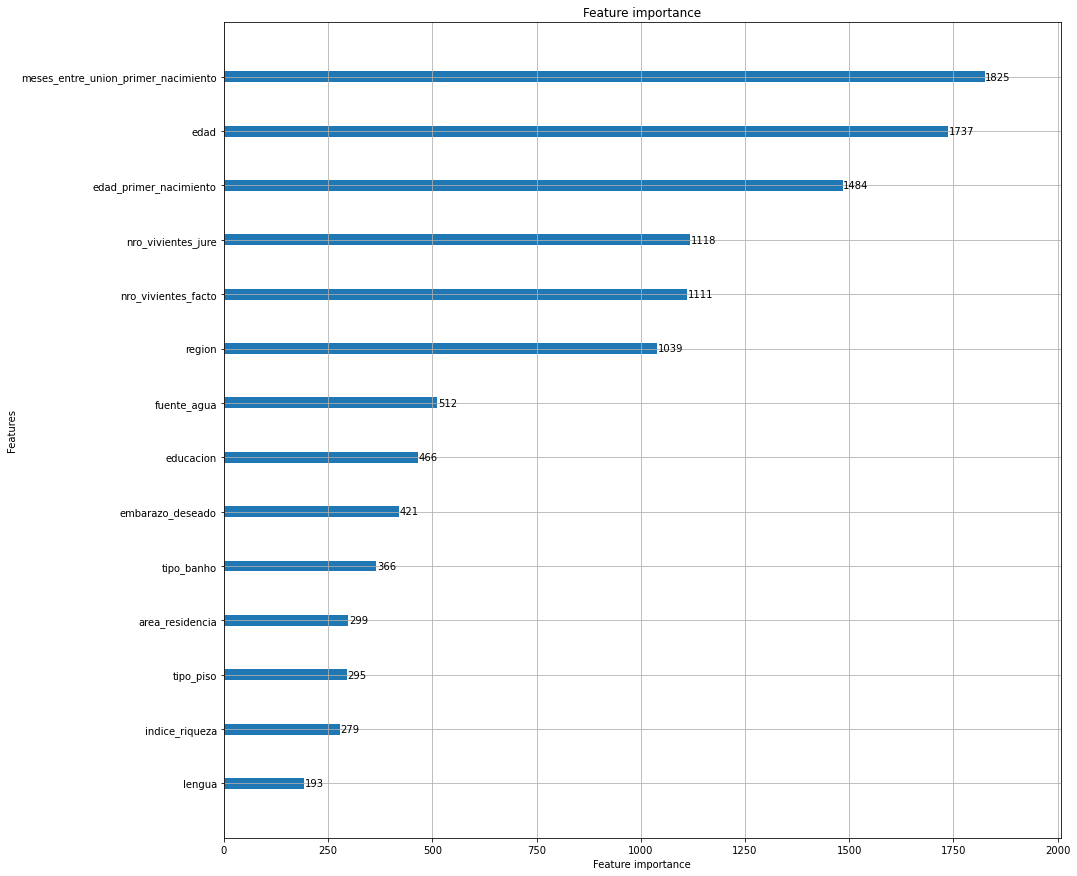

In [136]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [137]:
ax.figure.savefig('../files/08_plots/feat_imp_anemia_mujer_total.png')

# Fuente de agua

In [139]:
df_merge.fuente_agua.value_counts(dropna=False)

Red dentro de la vivienda                                 93777
Agua embotellada                                          11379
Red fuera de la vivienda pero dentro de la edificacion     7186
Otro                                                       4932
Rio / acequia / laguna                                     3600
Pilon o grifo publico                                      2782
Camion cisterna                                            2264
Manantial                                                  2216
Pozo dentro de la vivienda                                 1978
Pozo publico                                               1159
Agua de lluvia                                              379
Name: fuente_agua, dtype: int64

In [140]:
df_merge.loc[:, df_merge.dtypes == 'object'] =\
    df_merge.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [141]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131652 entries, 0 to 131651
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   anho                                 131652 non-null  int64   
 1   casa_id                              131652 non-null  int64   
 2   nro_vivientes_jure                   131652 non-null  int64   
 3   nro_vivientes_facto                  131652 non-null  int64   
 4   region                               131652 non-null  category
 5   area_residencia                      131652 non-null  category
 6   fuente_agua                          131652 non-null  category
 7   tipo_banho                           131652 non-null  category
 8   tipo_piso                            131652 non-null  category
 9   indice_riqueza                       131652 non-null  category
 10  persona_id                           131652 non-null  int64   
 11  

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [177]:
# fuente agua
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'nivel_anemia', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'sexo', 'edad', 'educacion',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'fuenta_agua', 'lengua']
col_target = 'embarazo_deseado'

In [145]:
feature= df_merge[cols_fit]
target= le.fit_transform(df_merge[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [146]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [154]:
parameters = {
    'application': 'multiclass',
    'objective': 'softmax',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class': 11
}


In [ ]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

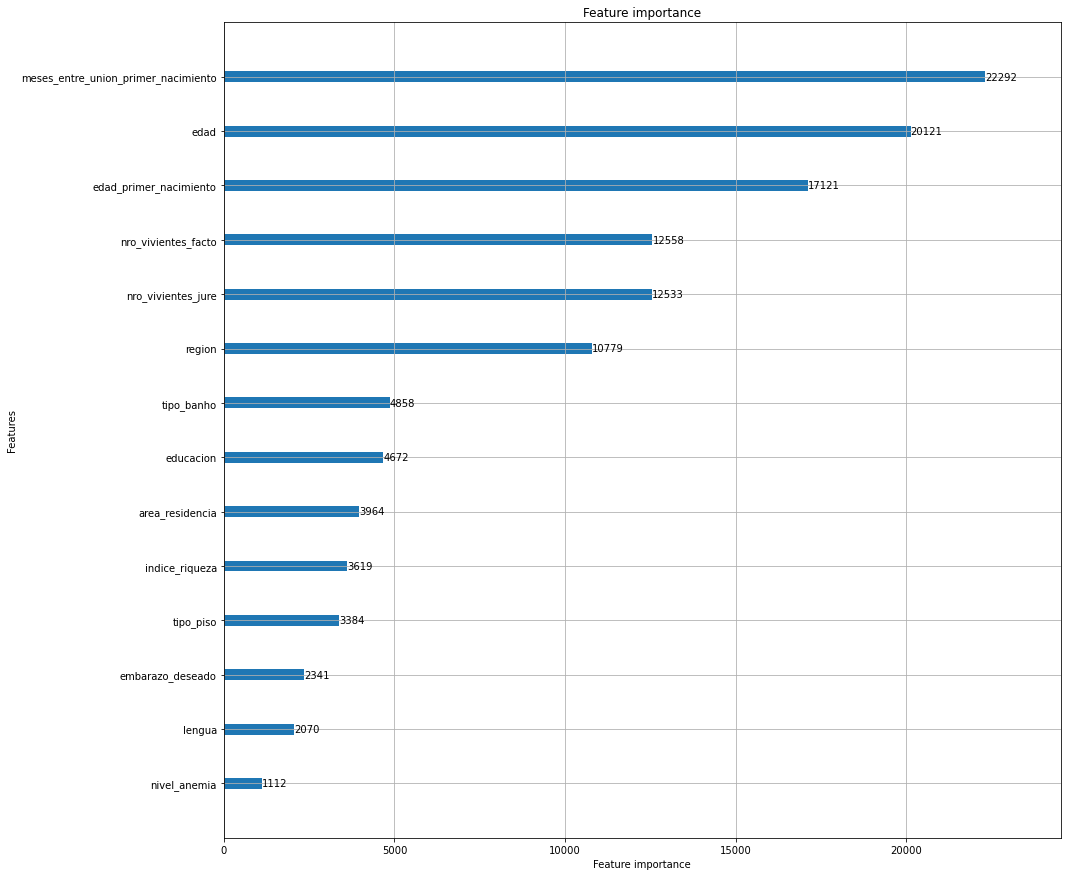

In [156]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [157]:
df_merge.meses_entre_union_primer_nacimiento.value_counts(dropna = False).sort_index()

-1.0      23044
 0.0       3348
 1.0       2620
 2.0       1897
 3.0       2246
          ...  
 283.0        1
 286.0        1
 294.0        1
 313.0        1
 NaN       7046
Name: meses_entre_union_primer_nacimiento, Length: 240, dtype: int64

In [158]:
df_merge.edad_primer_nacimiento.value_counts(dropna = False).sort_index()

10.0        2
11.0       20
12.0      134
13.0      591
14.0     2130
15.0     5292
16.0     9570
17.0    13151
18.0    14848
19.0    14971
20.0    13292
21.0    10939
22.0     8843
23.0     7086
24.0     5629
25.0     4778
26.0     3858
27.0     3326
28.0     2800
29.0     2163
30.0     1882
31.0     1459
32.0     1199
33.0      920
34.0      706
35.0      562
36.0      414
37.0      329
38.0      236
39.0      187
40.0      129
41.0      100
42.0       46
43.0       27
44.0       15
45.0       10
46.0        6
48.0        1
49.0        1
Name: edad_primer_nacimiento, dtype: int64

In [159]:
ax.figure.savefig('../files/08_plots/feat_imp_fuente_agua_mujer_total.png')

# EDAD primer nacimiento

In [160]:
df_merge.edad_primer_nacimiento.value_counts(dropna=False)

19.0    14971
18.0    14848
20.0    13292
17.0    13151
21.0    10939
16.0     9570
22.0     8843
23.0     7086
24.0     5629
15.0     5292
25.0     4778
26.0     3858
27.0     3326
28.0     2800
29.0     2163
14.0     2130
30.0     1882
31.0     1459
32.0     1199
33.0      920
34.0      706
13.0      591
35.0      562
36.0      414
37.0      329
38.0      236
39.0      187
12.0      134
40.0      129
41.0      100
42.0       46
43.0       27
11.0       20
44.0       15
45.0       10
46.0        6
10.0        2
48.0        1
49.0        1
Name: edad_primer_nacimiento, dtype: int64

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [167]:
# fuente agua
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'nivel_anemia', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'sexo', 'edad', 'educacion',
       'meses_entre_union_primer_nacimiento', 'fuente_agua',
       'embarazo_deseado', 'lengua']
col_target = 'edad_primer_nacimiento'

In [163]:
feature= df_merge[cols_fit]
target= le.fit_transform(df_merge[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [164]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [165]:
parameters = {
    'application': 'regression',
    'objective': 'regression',
    'metric': 'l2',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.005,
    'verbose': 0
}


In [ ]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

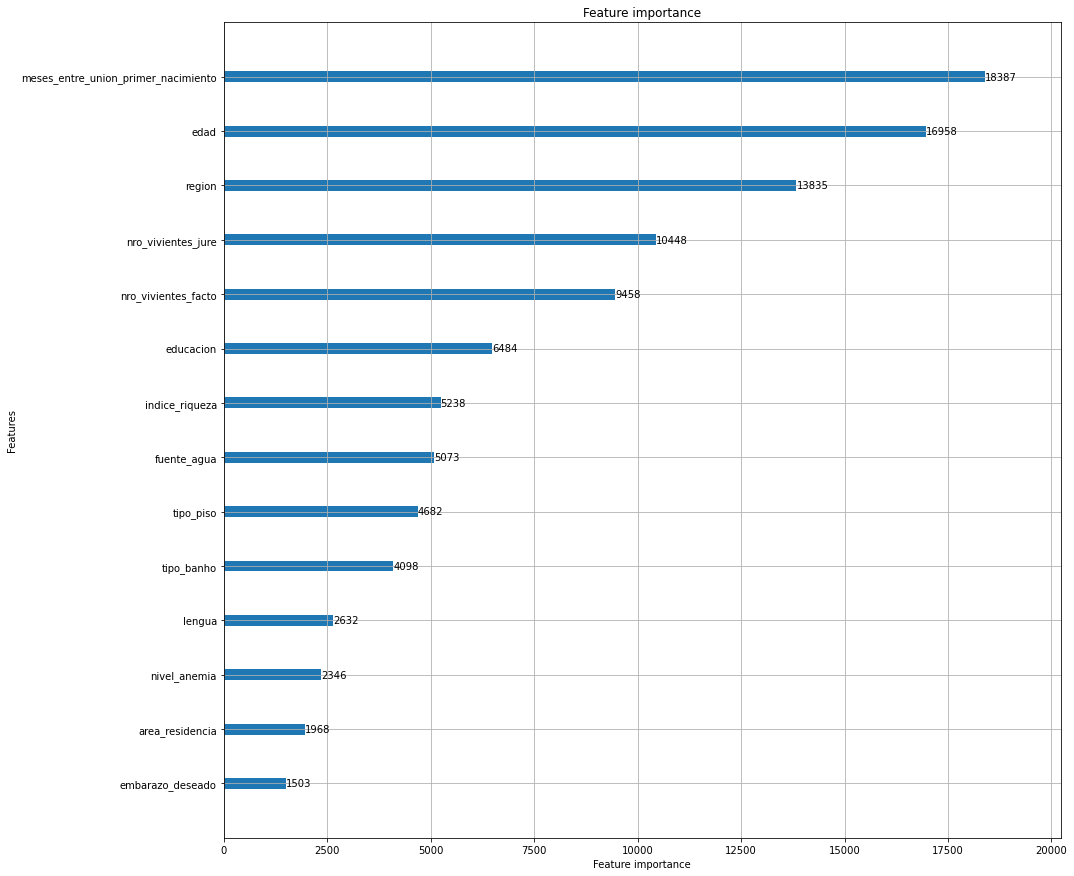

In [178]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [179]:
ax.figure.savefig('../files/08_plots/feat_imp_edad_primer_nacimiento_mujer_total.png')

# Embarazo deseado

In [169]:
df_merge.embarazo_deseado.value_counts(dropna=False)

NaN               127157
Queria esperar      1689
En ese momento      1680
No                  1126
Name: embarazo_deseado, dtype: int64

In [175]:
df_merge[df_merge['embarazo_deseado'].notnull() ].region.value_counts(dropna=False)

Lima             460
Loreto           320
Ucayali          253
Amazonas         231
Huanuco          193
San Martin       189
Tumbes           188
La Libertad      187
Madre de Dios    181
Piura            177
Ica              170
Lambayeque       167
Pasco            154
Callao           145
Ayacucho         143
Apurimac         142
Tacna            141
Arequipa         141
Cajamarca        140
Ancash           140
Moquegua         138
Junin            137
Huancavelica     137
Cusco            127
Puno              94
Name: region, dtype: int64

In [176]:
# drop nans
df_fit_embarazo =  df_merge[df_merge['embarazo_deseado'].notnull() ]

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [183]:
# fuente agua
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'nivel_anemia', 'tipo_banho', 'tipo_piso',
       'indice_riqueza', 'sexo', 'edad', 'educacion',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'fuente_agua', 'lengua']
col_target = 'embarazo_deseado'

In [184]:
feature= df_fit_embarazo[cols_fit]
target= le.fit_transform(df_fit_embarazo[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [185]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [186]:
parameters = {
    'application': 'multiclass',
    'objective': 'softmax',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class': 3
}


In [187]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 1.08163
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.07614
[3]	valid_0's multi_logloss: 1.07166
[4]	valid_0's multi_logloss: 1.06765
[5]	valid_0's multi_logloss: 1.06245
[6]	valid_0's multi_logloss: 1.05861
[7]	valid_0's multi_logloss: 1.05414
[8]	valid_0's multi_logloss: 1.05217
[9]	valid_0's multi_logloss: 1.04928
[10]	valid_0's multi_logloss: 1.04417
[11]	valid_0's multi_logloss: 1.04063
[12]	valid_0's multi_logloss: 1.03814
[13]	valid_0's multi_logloss: 1.03525
[14]	valid_0's multi_logloss: 1.03206
[15]	valid_0's multi_logloss: 1.03002
[16]	valid_0's multi_logloss: 1.02893
[17]	valid_0's multi_logloss: 1.0265
[18]	valid_0's multi_logloss: 1.02458
[19]	valid_0's multi_logloss: 1.02229
[20]	valid_0's multi_logloss: 1.02085
[21]	valid_0's multi_logloss: 1.01911
[22]	valid_0's multi_logloss: 1.0166
[23]	valid_0's multi_logloss: 1.01504
[24]	valid_0's multi_logloss: 1.01276
[25]	valid_0's multi_logloss: 1.01065

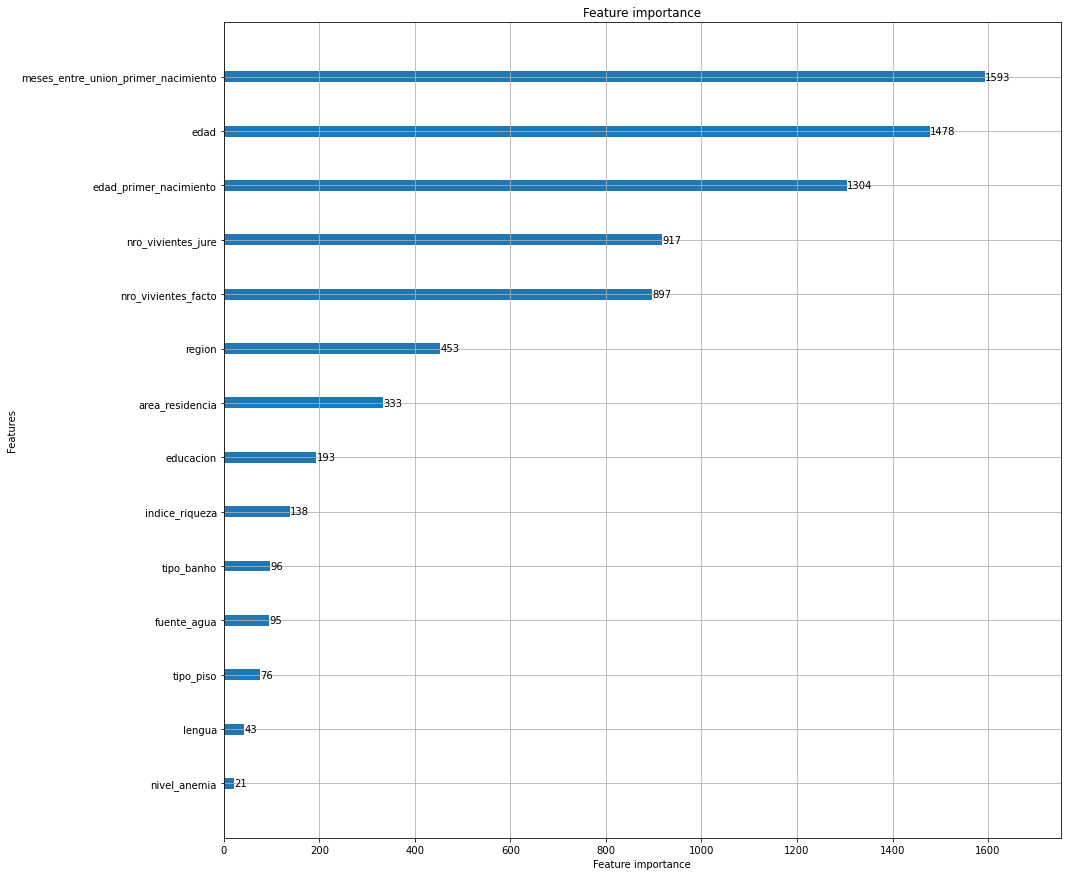

In [188]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [189]:
ax.figure.savefig('../files/08_plots/feat_imp_embarazo_deseado_mujer_total.png')

## Tipo piso

In [190]:
df_merge.tipo_piso.value_counts(dropna=False)

Cemento / Ladrillo             62840
Tierra / arena                 37849
Losetas / terrazos             15454
Madera                          9686
Lamina asfaltica o vinilico     3267
Parquet                         2053
Otro                             503
Name: tipo_piso, dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [194]:
# tipo_piso
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto',
       'region', 'area_residencia', 'nivel_anemia', 'tipo_banho', 'embarazo_deseado',
       'indice_riqueza', 'sexo', 'edad', 'educacion',
       'meses_entre_union_primer_nacimiento', 'edad_primer_nacimiento',
       'fuente_agua', 'lengua']
col_target = 'tipo_piso'

In [195]:
feature= df_merge[cols_fit]
target= le.fit_transform(df_merge[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [196]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [197]:
parameters = {
    'application': 'multiclass',
    'objective': 'softmax',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class': 7
}


In [198]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 1.30365
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_logloss: 1.28236
[3]	valid_0's multi_logloss: 1.25253
[4]	valid_0's multi_logloss: 1.23042
[5]	valid_0's multi_logloss: 1.21077
[6]	valid_0's multi_logloss: 1.19005
[7]	valid_0's multi_logloss: 1.17282
[8]	valid_0's multi_logloss: 1.16104
[9]	valid_0's multi_logloss: 1.14226
[10]	valid_0's multi_logloss: 1.1282
[11]	valid_0's multi_logloss: 1.11535
[12]	valid_0's multi_logloss: 1.10415
[13]	valid_0's multi_logloss: 1.08804
[14]	valid_0's multi_logloss: 1.08071
[15]	valid_0's multi_logloss: 1.06847
[16]	valid_0's multi_logloss: 1.06054
[17]	valid_0's multi_logloss: 1.05154
[18]	valid_0's multi_logloss: 1.04471
[19]	valid_0's multi_logloss: 1.03242
[20]	valid_0's multi_logloss: 1.02206
[21]	valid_0's multi_logloss: 1.01369
[22]	valid_0's multi_logloss: 1.00359
[23]	valid_0's multi_logloss: 0.996129
[24]	valid_0's multi_logloss: 0.988644
[25]	valid_0's multi_logloss: 0.98

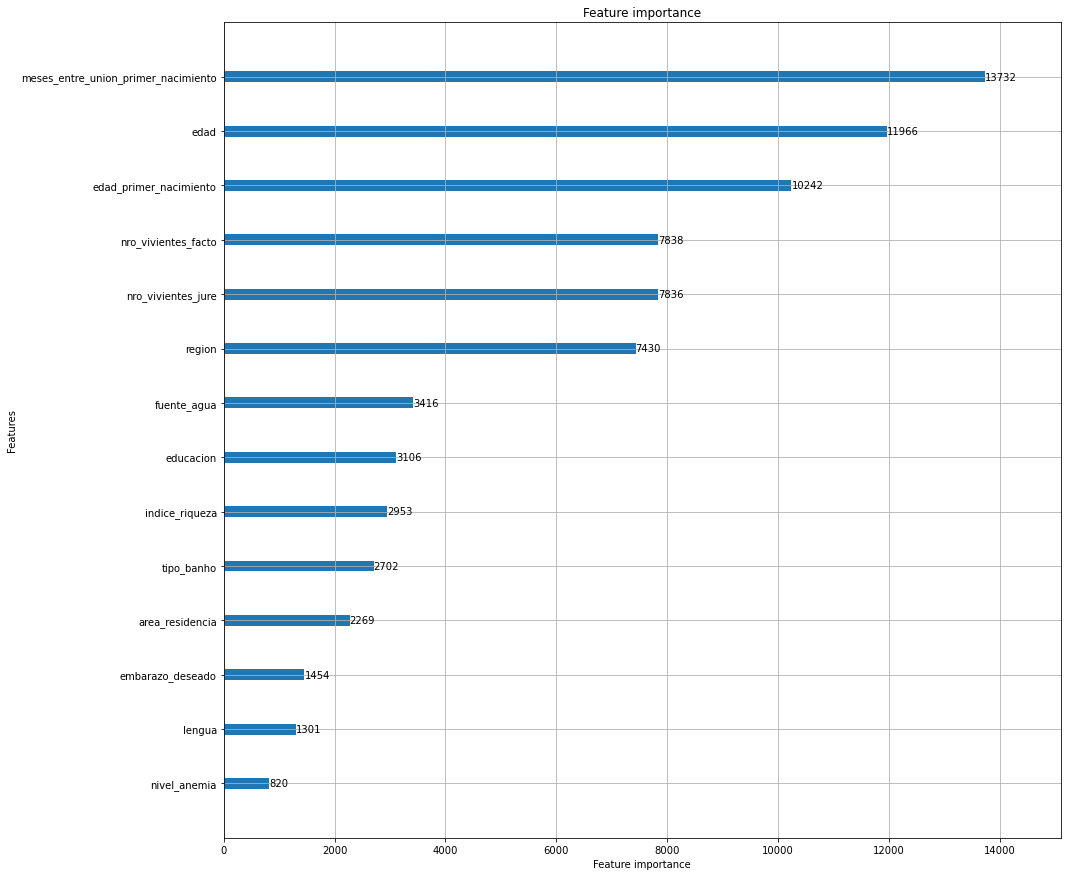

In [199]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [201]:
ax.figure.savefig('../files/08_plots/feat_imp_tipo_piso_mujer_total.png')